In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Reading in the Excel File
raw_data = pd.ExcelFile('Analyst_Dataset.xlsx')
Survey_data = pd.read_excel(raw_data, 'Purchase Exit Survey Data')
Airing_data = pd.read_excel(raw_data, 'Airings')
Lookup_data = pd.read_excel(raw_data, 'Lookup')

##### Cleaning Purchase Survey Data

In [3]:
#filling NaN values with the corresponding years, quarters, and months for concatenating datetime in the next step
Survey_data.iloc[0:3,2:] = Survey_data.iloc[0:3,2:].fillna(method = 'ffill', axis = 1)

In [4]:
date = Survey_data.iloc[0:4,2:].drop([1])
date.iloc[2,:] = date.iloc[2,:].astype(int)

#Setting header to be used in a cleaner and organized table
date_header = pd.to_datetime(date.astype(str).agg('-'.join, axis=0), format='%Y-%B-%d').dt.date
source_header = Survey_data.iloc[3,0:2]
header = source_header.append(date_header)

In [5]:
Survey_data.columns = header
Survey_data = Survey_data.iloc[4:]

In [6]:
#Filling NaN values in Source Category to appropriate category (Assumes that categories are sorted)
#Survey_data['Source Category'] = Survey_data['Source Category'].fillna(method = 'ffill', axis = 0)
Survey_data['Source Category'].fillna(method = 'ffill', axis = 0, inplace = True)

#Replacing NaN values with 0 in the actual data since NaN just means that no one saw XYZ on TV
Survey_data.iloc[:, 2:] = Survey_data.iloc[:, 2:].fillna(0)

#Reseting index to have cleaner and organized new indexing
Survey_data.reset_index(drop = True, inplace = True)

#Organized Survey data that looks formatted and is usable in Python
Survey_data.head(10)

,Source Category,Source,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-10,...,2017-10-21,2017-10-22,2017-10-23,2017-10-24,2017-10-25,2017-10-26,2017-10-27,2017-10-28,2017-10-29,2017-10-30
0,tv_commercial,(blank),0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,tv_commercial,aapka_colors,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,tv_commercial,baby_first,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tv_commercial,bloomberg,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,tv_commercial,cbs_sports,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,tv_commercial,cnbc,0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
6,tv_commercial,cnn,0,0.0,3.0,0.0,0.0,3.0,3.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,tv_commercial,comedy_central,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,tv_commercial,dateline,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
9,tv_commercial,dish_network,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Cleaning Airing_data

In [7]:
#Checking if there are missing values in Airing data
Airing_data.isna().sum()

#There seems to be a lot of missing values in Program, so we should look at in which network the program names were absent
print("Network with missing values in 'Program'")
print(Airing_data[Airing_data.isna()['Program']].groupby(['Network']).count())

print("Total number of airings")
print(Airing_data.groupby(['Network']).count().loc[['CNBCWORLD','MSNB','ZEETV']])

#Seems like ZEETV and CNBCWORLD have their program names always absent, whereas the missing value for MSNB seems to be a simple error
Airing_data[Airing_data.isna()['Program']].loc[Airing_data['Network'] == 'MSNB']

Network with missing values in 'Program'
           Company  Date/Time ET  Rotation  Creative  Spend  Lift  Program
Network                                                                   
CNBCWORLD      113           113       113       113    113   113        0
MSNB             1             1         1         1      1     1        0
ZEETV          600           600       600       600    600   600        0
Total number of airings
           Company  Date/Time ET  Rotation  Creative  Spend  Lift  Program
Network                                                                   
CNBCWORLD      113           113       113       113    113   113        0
MSNB            31            31        31        31     31    31       30
ZEETV          600           600       600       600    600   600        0


,Company,Date/Time ET,Rotation,Creative,Network,Spend,Lift,Program
6317,Company XYZ,2017-09-04 20:42:00,MSNB Weekday Prime,ISCICODE0015H,MSNB,1170.45,77,NaN


##### Cleaning Lookup Reference

In [8]:
#For Lookup_data, we simply need to change the header for convenience and remove the duplicate column
Lookup_header = ['Source', 'Network', 'Source2']
Lookup_data = Lookup_data[1:]
Lookup_data.columns = Lookup_header
Lookup_data.drop(['Source2'], axis= 1, inplace = True)
Lookup_data

,Source,Network
1,(blank),NaN
2,aapka_colors,NaN
3,baby_first,BABY
4,bloomberg,BLOM
5,cbs_sports,CBSS
6,cnbc,CNBC
7,cnn,CNN
8,comedy_central,COM
9,cozi,COZI
10,Dateline,DATELINE


## EDA

###### The purpose of this function is to plot (time vs spend) and (time vs lift) to see if one has any impact on the other over time

In [9]:
def plot_spend_lift_network(network):
    network_airing = Airing_data.loc[Airing_data['Network'] == network].sort_values('Date/Time ET', ascending = True)
    time = np.array(network_airing['Date/Time ET'])
    
    fig, ax1 = plt.subplots()
    plt.xticks(rotation=90)

    ax2 = ax1.twinx()
    ax1.plot(time, [0]*len(time), color = 'r')
    ax1.scatter(time, network_airing['Lift'], color = 'y', alpha = 0.5)
    ax2.scatter(time, network_airing['Spend'], alpha = 0.5)

    plt.show()

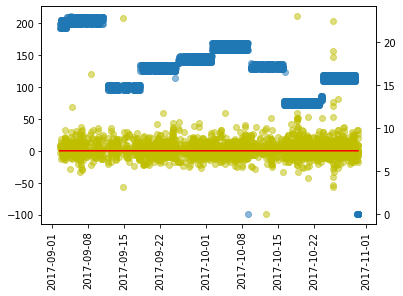

In [10]:
plot_spend_lift_network("WILO")

###### Plotting to see if there is correlation between Spend and Lift

###### Note that this part of report is not part of automated process since we are doing EDA to see how data looks like

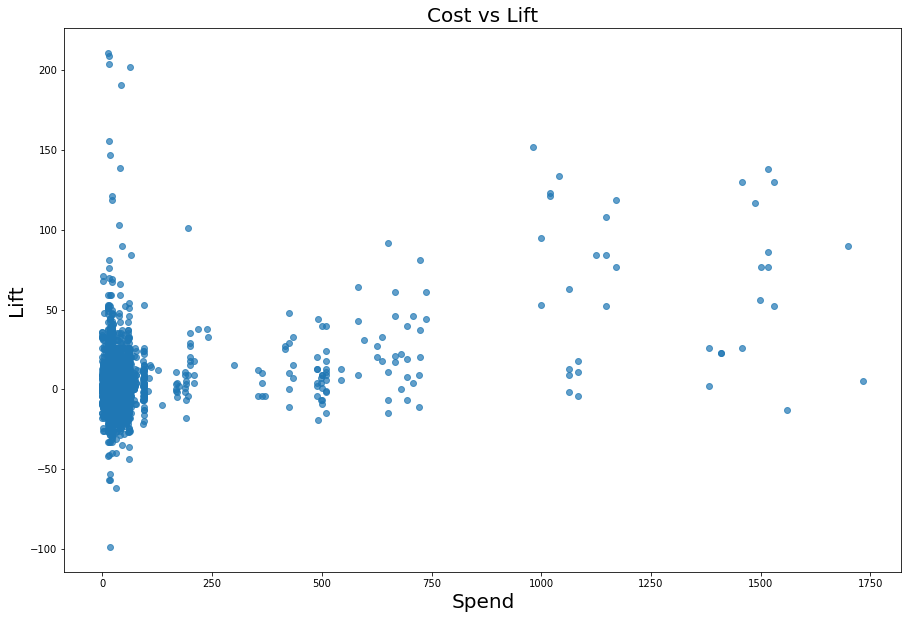

In [11]:
spend = Airing_data['Spend']
lift = Airing_data['Lift']

plt.figure(figsize=(15,10))
plt.scatter(spend, lift,alpha=0.7)
plt.xlabel('Spend', fontsize = 20)
plt.ylabel('Lift', fontsize = 20)
plt.title('Cost vs Lift', fontsize = 20)
plt.savefig('Cost vs Lift Large')

#There are a lot of noise near Spend = 0
#Noise near spend = 0 might be caused by shear number of free/cheap airings o networks like WILO

C:\Users\Isaac\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Isaac\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


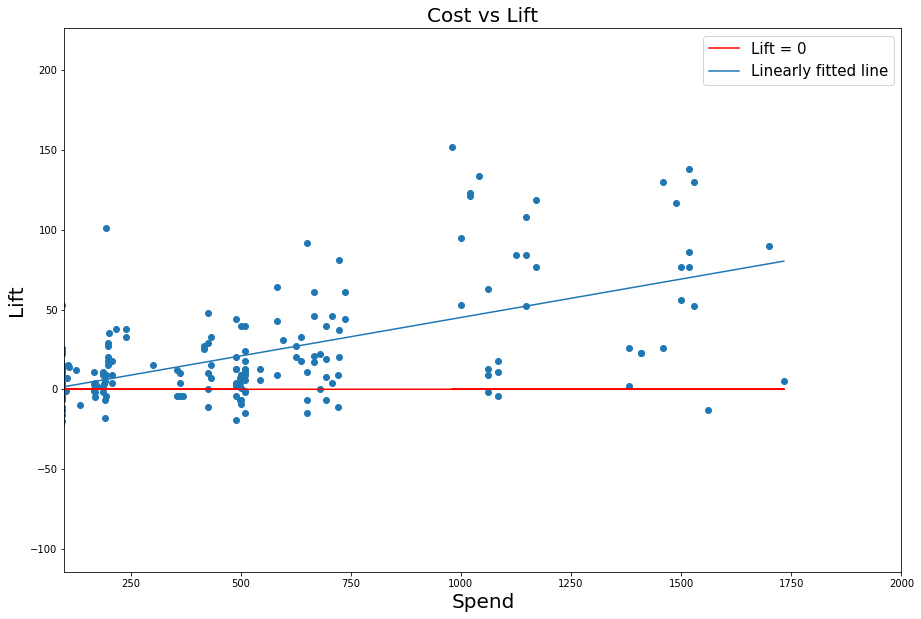

In [12]:
Large_Spend = Airing_data.loc[Airing_data['Spend'] >= 100]
X = np.array(Large_Spend['Spend'])
y = np.array(Large_Spend['Lift'])

coef = np.polyfit(X, y, 1)
fn = range(int(max(X)))*coef[0]+ coef[1]

plt.figure(figsize=(15,10))
plt.plot(spend,[0]*len(spend), color = 'r', label = 'Lift = 0')
plt.scatter(spend, lift)
plt.plot(range(int(max(X))), fn, label = 'Linearly fitted line')
plt.xlim(100,2000)
plt.legend(fontsize= 15)
plt.xlabel('Spend', fontsize = 20)
plt.ylabel('Lift', fontsize = 20)
plt.title('Cost vs Lift', fontsize = 20)
plt.savefig('Cost vs Lift Zoomed in Linear Line.jpg')

#After zooming in Spend > 100, there is a weak but apparent positive trend between spend and lift

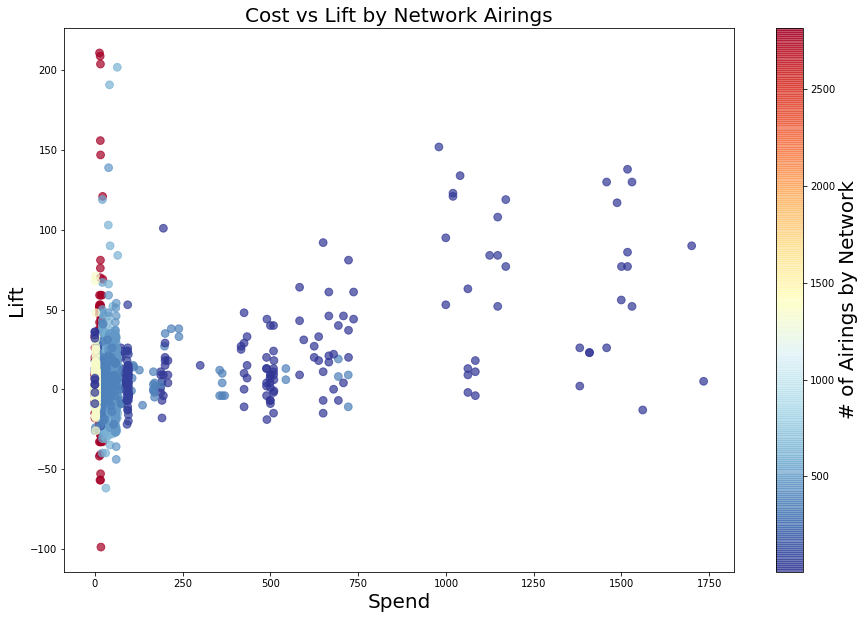

In [13]:
Network_count = Airing_data.groupby('Network').count()['Company']
Network_count = pd.DataFrame(Network_count)
Network_count.columns = ['Count']
New_Airing = pd.merge(Airing_data, Network_count, on = 'Network')

plt.figure(figsize= (15,10))

plot = plt.scatter(New_Airing['Spend'],New_Airing['Lift'], c=New_Airing['Count'], cmap = 'RdYlBu_r', alpha = 0.7, s= 60)
cbar = plt.colorbar(plot)
plt.title('Cost vs Lift by Network Airings', fontsize = 20)
plt.xlabel('Spend', fontsize= 20)
plt.ylabel('Lift', fontsize = 20)
cbar.set_label('# of Airings by Network', fontsize = 20)
plt.savefig('Cost vs Lift by Network Airings.jpg')

#As it can be seen from this plot, the larger the number of airings, it tends to create more noise in lift
#Another verification of lower the cost, more airings

# Question 1

## Cost Per Visitor driven by the TV campaign

#### This is basically to calculate Spend/Lift since Spend is the cost, and Lift is Visitors who visit the website because of the ads

In [14]:
#CPV for overall dataset
print("Cost Per Visitor from the entire Airing data")
print(Airing_data['Spend'].sum()/Airing_data['Lift'].sum())

Cost Per Visitor from the entire Airing data
10.808651339874064


In [15]:
#CPV by Network
CPV_Network = Airing_data.groupby('Network').sum()['Spend'].divide(Airing_data.groupby('Network').sum()['Lift'])
CPV_Month = Airing_data.groupby(pd.Grouper(key='Date/Time ET', freq='M')).sum()['Spend'].divide(Airing_data.groupby(pd.Grouper(key='Date/Time ET', freq='M')).sum()['Lift'])
CPV_Count_Network = Airing_data.groupby('Network').count()['Spend']
CPV_Count_Month = Airing_data.groupby(pd.Grouper(key='Date/Time ET', freq='M')).count()['Spend']

print("Total Cost Per Visitor by Network")
print(CPV_Network.sort_values())
print("\n")
print("Average Cost Per Visitor (Cost Per Visitor per Airing) by Network")
print(CPV_Network.divide(CPV_Count_Network).sort_values())

Total Cost Per Visitor by Network
Network
DISH          2.777775
WILO          5.811367
STARPLUS      6.607156
MSNB         10.089083
OANN         10.512226
ZEETV        14.706634
CNBC         15.964089
CNN          16.757031
DATELINE     17.735626
HIST         22.055455
FS1          23.270492
BLOM         24.958392
SPECSPTS     25.364818
CNBCWORLD    25.490000
NFLN         27.064000
TNT          28.634078
TWC          36.581564
SCI          60.554394
COM          69.456019
dtype: float64


Average Cost Per Visitor (Cost Per Visitor per Airing) by Network
Network
DISH         0.002052
WILO         0.002064
STARPLUS     0.012235
OANN         0.022558
ZEETV        0.024511
DATELINE     0.050818
CNBCWORLD    0.225575
MSNB         0.325454
BLOM         0.470913
CNBC         1.140292
CNN          1.289002
TWC          1.662798
SPECSPTS     1.811773
FS1          2.327049
HIST         2.450606
NFLN         3.383000
TNT          3.579260
SCI          3.784650
COM          9.922288
dtype: float

In [16]:
CPV_Network_Count = pd.merge(pd.DataFrame(CPV_Network), pd.DataFrame(CPV_Count_Network), on='Network')
CPV_Network_Count.columns = ['CPV','Count']

#### Networks like WILO and DISH seem to return highest efficiency by costing less per visitor, but when you look at the number of these networks aired the ad, it confirms previous statement less cost -> more airing, thus causing more efficient CPV

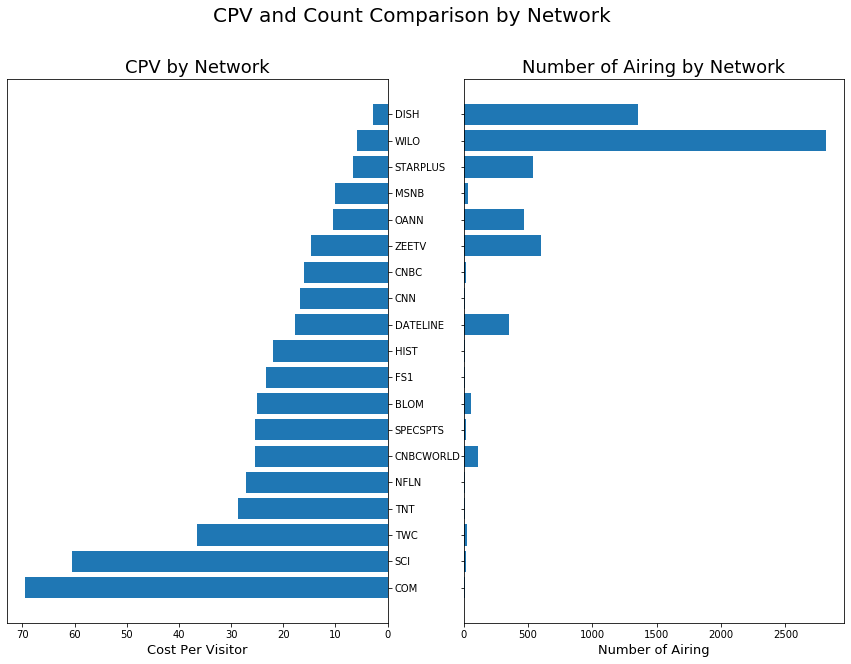

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize = (15,10))
fig.suptitle('CPV and Count Comparison by Network', fontsize = 20)
ax1.barh(CPV_Network_Count['CPV'].sort_values(ascending = False).index,CPV_Network_Count['CPV'].sort_values(ascending = False))
ax1.invert_xaxis()
ax1.yaxis.tick_right()
ax1.set_title('CPV by Network', fontsize = 18)
ax2.barh(CPV_Network_Count['CPV'].sort_values(ascending = False).index, CPV_Network_Count.loc[CPV_Network_Count['CPV'].sort_values(ascending = False).index]['Count'])
ax2.set_title('Number of Airing by Network', fontsize = 18)
ax1.set_xlabel("Cost Per Visitor", fontsize = 13)
ax2.set_xlabel("Number of Airing", fontsize = 13)

plt.show()
fig.savefig('CPV and Count Comparison by Network.jpg')

##### CPV by month was also calculated to generalize the report, but in this particular case, it doesn't give much insight on the trend of CPV due to the fact that there are only two months of data available

In [18]:
CPV_Month_Count = pd.merge(pd.DataFrame(CPV_Month), pd.DataFrame(CPV_Count_Month), on='Date/Time ET')
CPV_Month_Count.columns = ['CPV','Count']
CPV_Month_Count.index = CPV_Month_Count.index.strftime('%Y-%m')
CPV_Month_Count

,CPV,Count
Date/Time ET,,
2017-09,11.387333,3000
2017-10,10.310446,3443


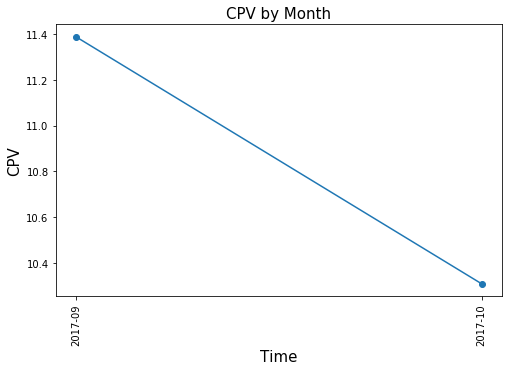

In [19]:
plt.figure(figsize=(8,5))
plt.plot(np.array(CPV_Month_Count.index), np.array(CPV_Month_Count['CPV']), marker = 'o')
plt.xticks(rotation=90)
plt.title("CPV by Month",fontsize = 15)
plt.xlabel("Time", fontsize = 15)
plt.ylabel("CPV", fontsize = 15)
plt.savefig("CPV by Month.jpg")

# Question 2

## Conversion Rate (Purchases / Lift), and Cost Per Acquisition (CPA) driven by the campaign

#### Conversion rate (CR) is (Purchase/Lift), and Cost Per Acquisition is Amount spent per conversion, so it must be (Spend/Purchase)

In [20]:
def metrics(df):
    Spend = df['Spend']
    Lift = df['Lift']
    Purchase = df['Purchase']
    Count = df['Count']

    df['Avg Spend'] = Spend.divide(Count)
    df['Avg Lift'] = Lift.divide(Count)
    df['Total CPV'] = Spend.divide(Lift)
    df['Avg CPV'] = df['Total CPV'].divide(Count)
    df['Total CR'] = Purchase.divide(Lift)
    df['Avg CR'] = df['Total CR'].divide(Count)
    df['Total CPA'] = Spend.divide(Purchase)
    df['Avg CPA'] = df['Total CPA'].divide(Count)
    
    return df

In [21]:
#Grouping Airing data by month and network
Airing_Monthly = Airing_data.groupby(['Network',pd.Grouper(key = 'Date/Time ET', freq='M')], dropna = False).sum(min_count=1)
Airing_Count = pd.DataFrame(Airing_data.groupby(['Network',pd.Grouper(key = 'Date/Time ET', freq='M')], dropna = False).count()['Lift'])
Airing_Count = Airing_Count.rename(columns={'Lift':'Count'})

Airing_Monthly = pd.merge(Airing_Monthly.reset_index(), Airing_Count, on =['Network', 'Date/Time ET']).groupby(['Network',pd.Grouper(key = 'Date/Time ET', freq='M')], dropna = False).sum(min_count = 1)

In [22]:
#Merging and Cleaning Purchase Survey data and Airing data
Purchase_Monthly = Survey_data.iloc[:,2:]
Purchase_header = Survey_data['Source']
Purchase_Monthly = pd.DataFrame(Purchase_Monthly.stack())
Purchase_Monthly.index.rename(['Source','Date/Time ET'], level = [0,1], inplace = True)
Purchase_Monthly = Purchase_Monthly.rename(columns={0:'Purchase'})
Purchase_Monthly.index.set_levels(Purchase_header, level=0, inplace = True)
Purchase_Monthly = Purchase_Monthly.reset_index()
Purchase_Monthly['Date/Time ET'] = pd.to_datetime(Purchase_Monthly['Date/Time ET'])
Purchase_Monthly = Purchase_Monthly.groupby(by = ['Source', pd.Grouper(key= 'Date/Time ET', freq='M')]).sum(min_count=1)
Purchase_Monthly = pd.merge(Purchase_Monthly.reset_index(), Lookup_data, on='Source')
Purchase_Monthly = Purchase_Monthly.groupby(by = ['Source','Network','Date/Time ET'], dropna = False).sum(min_count=1)

#Real is with sources that have all the purchase and airing data
Data_Monthly_Real = pd.merge(Purchase_Monthly.reset_index(), Airing_Monthly, on = ['Network','Date/Time ET'])
Data_Monthly_Real = Data_Monthly_Real.groupby(by = ['Source','Network', pd.Grouper(key= 'Date/Time ET', freq='M')], dropna = False).sum(min_count=1)

#Estimate is including sources that do not have Airing data, but filled in with estimated spend and lift data based on real CR and CPA
Data_Monthly_Estimate = pd.merge(Purchase_Monthly.reset_index(), Airing_Monthly, on = ['Network', 'Date/Time ET'], how = 'left')
Data_Monthly_Estimate = Data_Monthly_Estimate.groupby(by = ['Source','Network', 'Date/Time ET'], dropna = False).sum(min_count=1)

#Overall data is made for the purpose of not mixing up calculations, especially for averaged values, which cannot be summed later
#Also this gives convenience of handling single indexed dataframe
Overall_Network_Real = Data_Monthly_Real.groupby('Network').sum()
Overall_Month_Real = Data_Monthly_Real.groupby('Date/Time ET').sum()

C:\Users\Isaac\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: inplace is deprecated and will be removed in a future version.
  import sys


In [23]:
#Before we group and append all the metrics for each network and month, we calculate the overall CR and CPA
Total_CR = Data_Monthly_Real['Purchase'].sum()/Data_Monthly_Real['Lift'].sum()
Total_CPA = Data_Monthly_Real['Spend'].sum()/Data_Monthly_Real['Purchase'].sum()

print("Total Conversion Rate of entire dataset: %f" %Total_CR)
print("Total Cost per Acquisition of entire dataset: %f" %Total_CPA)

Total Conversion Rate of entire dataset: 0.007540
Total Cost per Acquisition of entire dataset: 1350.205685


In [24]:
#We add all the metrics like CR and CPA
Data_Real = metrics(Data_Monthly_Real)
Data_Real

Purchase     Spend  Lift  \
Source                   Network  Date/Time ET                             
bloomberg                BLOM     2017-09-30         1.0   4966.72   199   
cnbc                     CNBC     2017-09-30         5.0   6481.42   406   
cnn                      CNN      2017-09-30        13.0   9159.60   507   
                                  2017-10-31        10.0   8954.75   574   
comedy_central           COM      2017-10-31         2.0   7501.25   108   
dish_network             DISH     2017-09-30         4.0   2513.09   976   
                                  2017-10-31         1.0    520.24   116   
fox_sports               FS1      2017-09-30         1.0   4258.50   183   
msnbc                    MSNB     2017-09-30        10.0   8091.15   701   
                                  2017-10-31         6.0   3238.89   422   
nfl_network              NFLN     2017-09-30         2.0   5412.80   200   
one_america_news_network OANN     2017-09-30         2.0   4966.80   648   
                                  2017-10-31        14.0  19968.20  1724   
science                  SCI      2017-09-30         1.0   7993.18   132   
spectrum_sports          SPECSPTS 2017-09-30         2.0   5580.26   220   
star_plus                STARPLUS 2017-09-30         2.0   3441.58   562   
                                  2017-10-31         2.0   8338.98  1221   
the_history_channel      HIST     2017-09-30         4.0   5778.30   253   
                                  2017-10-31         1.0   1500.00    77   
turner_network_tv        TNT      2017-09-30         2.0   5125.50   179   
willow_tv                WILO     2017-09-30        27.0  19773.49  3138   
                                  2017-10-31        29.0  27961.08  5076   
zeetv                    ZEETV    2017-09-30         2.0  10175.13   922   
                                  2017-10-31         3.0  15429.12   819   

                                                Count    Avg Spend   Avg Lift  \
Source                   Network  Date/Time ET                                  
bloomberg                BLOM     2017-09-30       53    93.711698   3.754717   
cnbc                     CNBC     2017-09-30       14   462.958571  29.000000   
cnn                      CNN      2017-09-30        7  1308.514286  72.428571   
                                  2017-10-31        6  1492.458333  95.666667   
comedy_central           COM      2017-10-31        7  1071.607143  15.428571   
dish_network             DISH     2017-09-30     1150     2.185296   0.848696   
                                  2017-10-31      204     2.550196   0.568627   
fox_sports               FS1      2017-09-30       10   425.850000  18.300000   
msnbc                    MSNB     2017-09-30       23   351.789130  30.478261   
                                  2017-10-31        8   404.861250  52.750000   
nfl_network              NFLN     2017-09-30        8   676.600000  25.000000   
one_america_news_network OANN     2017-09-30      125    39.734400   5.184000   
                                  2017-10-31      341    58.557771   5.055718   
science                  SCI      2017-09-30       16   499.573750   8.250000   
spectrum_sports          SPECSPTS 2017-09-30       14   398.590000  15.714286   
star_plus                STARPLUS 2017-09-30      150    22.943867   3.746667   
                                  2017-10-31      390    21.382000   3.130769   
the_history_channel      HIST     2017-09-30        8   722.287500  31.625000   
                                  2017-10-31        1  1500.000000  77.000000   
turner_network_tv        TNT      2017-09-30        8   640.687500  22.375000   
willow_tv                WILO     2017-09-30     1073    18.428229   2.924511   
                                  2017-10-31     1743    16.041928   2.912220   
zeetv                    ZEETV    2017-09-30      213    47.770563   4.328638   
                                  2017-10-31  

In [25]:
#Calculate the mean and the median values of Data_Real to fill missing values for networks without Airing data
#Instead of using Spend or Lift of entire dataset, mean CR and CPA are used to correlate Spend and Lift with Purchase data
Means = Data_Real.groupby(level=2).mean()[['Total CR','Total CPA', 'Avg CPA']]

#Cleaning and merging Estimated 
Data_Monthly_Estimate = pd.merge(Data_Monthly_Estimate.reset_index(), Means.reset_index(), on=['Date/Time ET'])
Data_Monthly_Estimate['Spend'].fillna(Data_Monthly_Estimate['Total CPA']*Data_Monthly_Estimate['Purchase'], inplace = True)
Data_Monthly_Estimate['Lift'].fillna(Data_Monthly_Estimate['Purchase']/Data_Monthly_Estimate['Total CR'], inplace = True)
Data_Monthly_Estimate['Count'].fillna(Data_Monthly_Estimate['Total CPA']/Data_Monthly_Estimate['Avg CPA'], inplace = True)

#Dropping these columns since they were just used to get estimated spend, lift, and count, and to run through metrics function
Data_Monthly_Estimate.drop(['Total CR','Total CPA', 'Avg CPA'],axis=1, inplace = True)

#Getting rid of rows where purchase is 0, this data didn't exist in original survey data
Data_Monthly_Estimate = Data_Monthly_Estimate[Data_Monthly_Estimate['Purchase'] != 0]
Data_Monthly_Estimate = Data_Monthly_Estimate.groupby(['Source','Network','Date/Time ET'], dropna= False).sum()

Overall_Network_Estimate = Data_Monthly_Estimate.groupby('Network').sum()
Overall_Month_Estimate = Data_Monthly_Estimate.groupby('Date/Time ET').sum()

Data_Estimate = metrics(Data_Monthly_Estimate)

Data_Estimate

Purchase         Spend  \
Source                   Network  Date/Time ET                           
(blank)                  NaN      2017-10-31         3.0   6303.053391   
aapka_colors             NaN      2017-09-30         1.0   2678.974506   
                                  2017-10-31         5.0  10505.088985   
baby_first               BABY     2017-09-30         1.0   2678.974506   
bloomberg                BLOM     2017-09-30         1.0   4966.720000   
                                  2017-10-31         1.0   2101.017797   
cbs_sports               CBSS     2017-09-30         1.0   2678.974506   
cnbc                     CNBC     2017-09-30         5.0   6481.420000   
                                  2017-10-31        10.0  21010.177969   
cnn                      CNN      2017-09-30        13.0   9159.600000   
                                  2017-10-31        10.0   8954.750000   
comedy_central           COM      2017-10-31         2.0   7501.250000   
dish_network             DISH     2017-09-30         4.0   2513.090000   
                                  2017-10-31         1.0    520.240000   
diy                      NaN      2017-09-30         2.0   5357.949013   
espn                     ENN      2017-10-31         4.0   8404.071188   
fox_news                 FNEW     2017-09-30         5.0  13394.872532   
                                  2017-10-31         9.0  18909.160172   
fox_sports               FS1      2017-09-30         1.0   4258.500000   
                                  2017-10-31         1.0   2101.017797   
fyi                      FYI      2017-10-31         2.0   4202.035594   
hgtv                     HGTV     2017-09-30         6.0  16073.847039   
msnbc                    MSNB     2017-09-30        10.0   8091.150000   
                                  2017-10-31         6.0   3238.890000   
nfl_network              NFLN     2017-09-30         2.0   5412.800000   
                                  2017-10-31         1.0   2101.017797   
one_america_news_network OANN     2017-09-30         2.0   4966.800000   
                                  2017-10-31        14.0  19968.200000   
oprah_winfrey_network    OWN      2017-10-31         1.0   2101.017797   
other                    NaN      2017-09-30         5.0  13394.872532   
                                  2017-10-31         8.0  16808.142375   
science                  SCI      2017-09-30         1.0   7993.180000   
                                  2017-10-31         3.0   6303.053391   
sony_entertainment_tv    NaN      2017-09-30         2.0   5357.949013   
                                  2017-10-31         2.0   4202.035594   
spectrum_sports          SPECSPTS 2017-09-30         2.0   5580.260000   
                                  2017-10-31         1.0   2101.017797   
star_plus                STARPLUS 2017-09-30         2.0   3441.580000   
                                  2017-10-31         2.0   8338.980000   
television_food_network  FOOD     2017-09-30         4.0  10715.898026   
the_history_channel      HIST     2017-09-30         4.0   5778.300000   
                                  2017-10-31         1.0   1500.000000   
turner_network_tv        TNT      2017-09-30         2.0   5125.500000   
                                  2017-10-31         2.0   4202.035594   
willow_tv                WILO     2017-09-30        27.0  19773.490000   
                                  2017-10-31        29.0  27961.080000   
zeetv                    ZEETV    2017-09-30         2.0  10175.130000   
                                  2017-10-31         3.0  15429.120000   

                                                       Lift        Count  \
Source                   Network  Date/Time ET                             
(blank)                  NaN      2017-10-31     297.027584     8.279718   
aapka_colors             NaN      2017-09-30     108.791618    17.154404   
                                  2017-10-3

In [26]:
#These overall data are without network with 0 purchases since we need to calculate CR and CPA
Data_Overall_Network_Real = metrics(Overall_Network_Real)
Data_Overall_Month_Real = metrics(Overall_Month_Real)
Data_Overall_Network_Estimate = metrics(Overall_Network_Estimate)
Data_Overall_Month_Estimate = metrics(Overall_Month_Estimate)

Data_Overall_Month_Real.index = Data_Overall_Month_Real.index.strftime('%Y-%m')
Data_Overall_Month_Estimate.index = Data_Overall_Month_Estimate.index.strftime('%Y-%m')


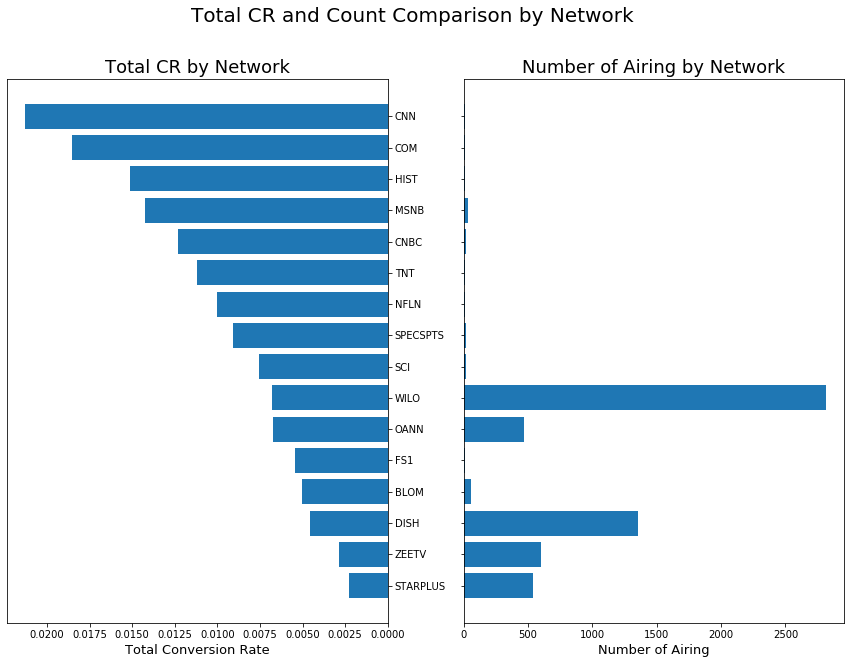

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize = (15,10))
fig.suptitle('Total CR and Count Comparison by Network', fontsize = 20)
ax1.barh(Data_Overall_Network_Real['Total CR'].sort_values().index, Data_Overall_Network_Real['Total CR'].sort_values())
ax1.invert_xaxis()
ax1.yaxis.tick_right()
ax1.set_title('Total CR by Network', fontsize = 18)
ax2.barh(Data_Overall_Network_Real['Total CR'].sort_values().index, Data_Overall_Network_Real.loc[Data_Overall_Network_Real['Total CR'].sort_values().index]['Count'])
ax2.set_title('Number of Airing by Network', fontsize = 18)
ax1.set_xlabel("Total Conversion Rate", fontsize = 13)
ax2.set_xlabel("Number of Airing", fontsize = 13)
plt.show()
fig.savefig('Total CR and Count Comparison by Network.jpg')

#The number of airing doesn't seem to be correlated to the conversion rate

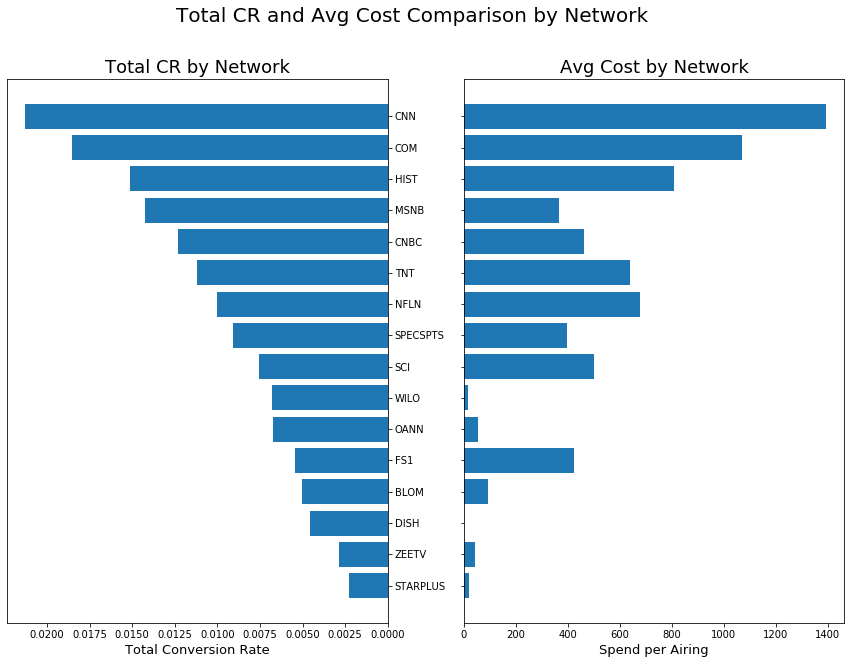

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize = (15,10))
fig.suptitle('Total CR and Avg Cost Comparison by Network', fontsize = 20)
ax1.barh(Data_Overall_Network_Real['Total CR'].sort_values().index, Data_Overall_Network_Real['Total CR'].sort_values())
ax1.invert_xaxis()
ax1.yaxis.tick_right()
ax1.set_title('Total CR by Network', fontsize = 18)
ax2.barh(Data_Overall_Network_Real['Total CR'].sort_values().index, Data_Overall_Network_Real.loc[Data_Overall_Network_Real['Total CR'].sort_values().index]['Avg Spend'])
ax2.set_title('Avg Cost by Network', fontsize = 18)
ax1.set_xlabel("Total Conversion Rate", fontsize = 13)
ax2.set_xlabel("Spend per Airing", fontsize = 13)
plt.show()
fig.savefig('Total CR and Avg Spend Comparison by Network.jpg')

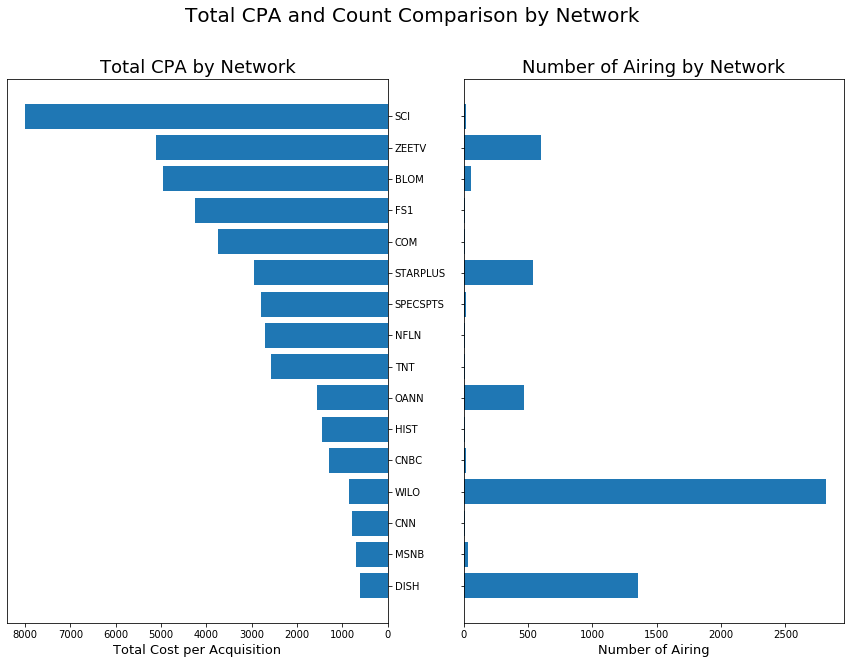

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize = (15,10))
fig.suptitle('Total CPA and Count Comparison by Network', fontsize = 20)
ax1.barh(Data_Overall_Network_Real['Total CPA'].sort_values().index, Data_Overall_Network_Real['Total CPA'].sort_values())
ax1.invert_xaxis()
ax1.yaxis.tick_right()
ax1.set_title('Total CPA by Network', fontsize = 18)
ax2.barh(Data_Overall_Network_Real['Total CPA'].sort_values().index, Data_Overall_Network_Real.loc[Data_Overall_Network_Real['Total CPA'].sort_values().index]['Count'])
ax2.set_title('Number of Airing by Network', fontsize = 18)
ax1.set_xlabel("Total Cost per Acquisition", fontsize = 13)
ax2.set_xlabel("Number of Airing", fontsize = 13)
plt.show()
fig.savefig("Total CPA and Count Comparison.jpg")

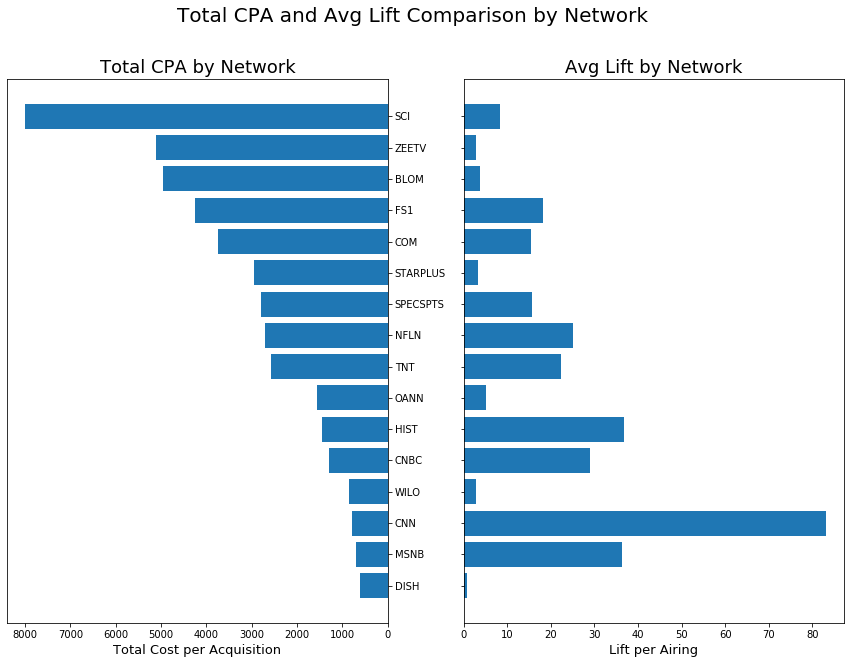

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize = (15,10))
fig.suptitle('Total CPA and Avg Lift Comparison by Network', fontsize = 20)
ax1.barh(Data_Overall_Network_Real['Total CPA'].sort_values().index, Data_Overall_Network_Real['Total CPA'].sort_values())
ax1.invert_xaxis()
ax1.yaxis.tick_right()
ax1.set_title('Total CPA by Network', fontsize = 18)
ax2.barh(Data_Overall_Network_Real['Total CPA'].sort_values().index, Data_Overall_Network_Real.loc[Data_Overall_Network_Real['Total CPA'].sort_values().index]['Avg Lift'])
ax2.set_title('Avg Lift by Network', fontsize = 18)
ax1.set_xlabel("Total Cost per Acquisition", fontsize = 13)
ax2.set_xlabel("Lift per Airing", fontsize = 13)
plt.show()
fig.savefig('Total CPA and Avg Lift Comparison by Network.jpg')

##### As shown above with CPV data by month, it does not give much insight with only two data points, but this is a generalized version for future data 

C:\Users\Isaac\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Isaac\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


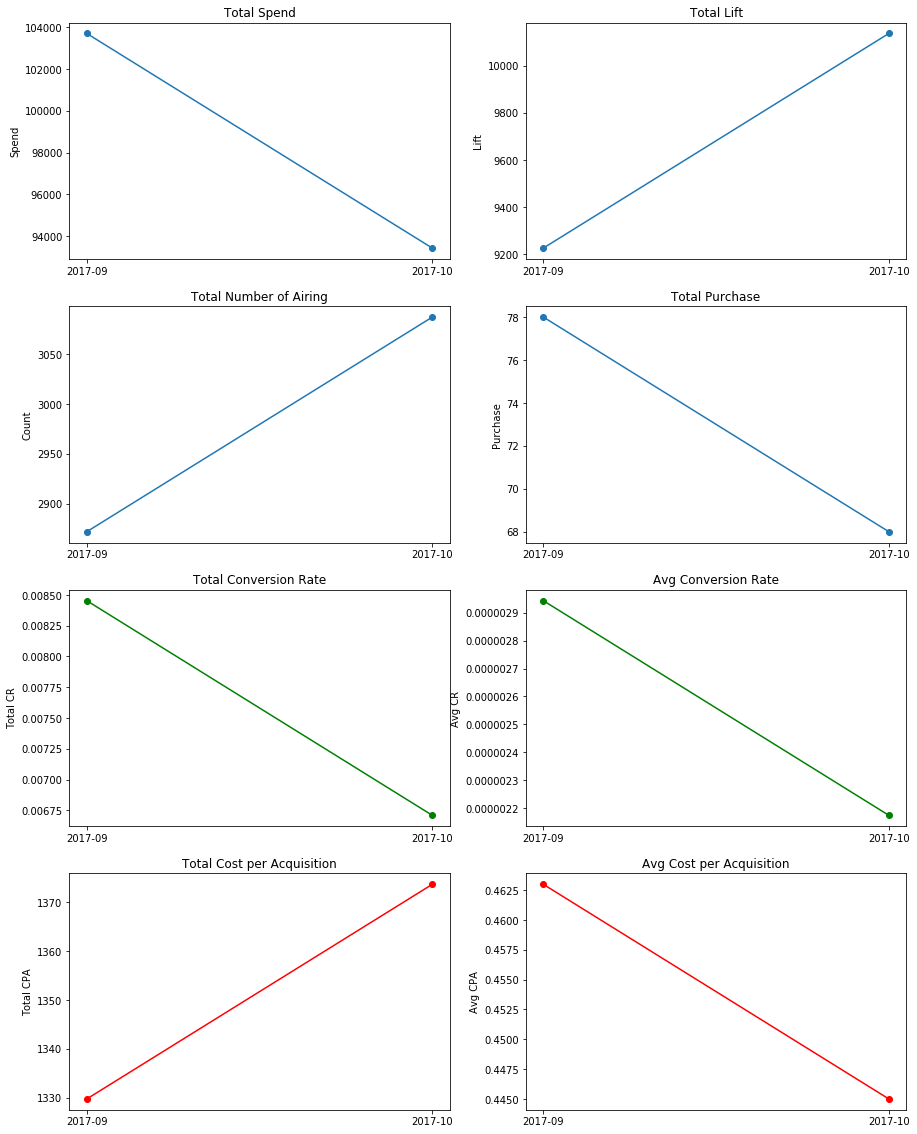

In [31]:
x = np.array(Data_Overall_Month_Real.index)

plt.figure(figsize=(15,20))
plt.subplot(4, 2, 1)
plt.plot(x,Data_Overall_Month_Real['Spend'], marker = 'o')
plt.title('Total Spend')
plt.ylabel('Spend')

plt.subplot(4, 2, 2)
plt.plot(x,Data_Overall_Month_Real['Lift'], marker = 'o')
plt.title('Total Lift')
plt.ylabel('Lift')

plt.subplot(4, 2, 3)
plt.plot(x,Data_Overall_Month_Real['Count'], marker = 'o')
plt.title('Total Number of Airing')
plt.ylabel('Count')

plt.subplot(4, 2, 4)
plt.plot(x,Data_Overall_Month_Real['Purchase'], marker = 'o')
plt.title('Total Purchase')
plt.ylabel('Purchase')

plt.subplot(4, 2, 5)
plt.plot(x,Data_Overall_Month_Real['Total CR'], marker = 'o', color = 'g')
plt.title('Total Conversion Rate')
plt.ylabel('Total CR')

plt.subplot(4, 2, 6)
plt.plot(x,Data_Overall_Month_Real['Avg CR'], marker = 'o', color = 'g')
plt.title('Avg Conversion Rate')
plt.ylabel('Avg CR')

plt.subplot(4, 2, 7)
plt.plot(x,Data_Overall_Month_Real['Total CPA'], marker = 'o', color = 'r')
plt.title('Total Cost per Acquisition')
plt.ylabel('Total CPA')

plt.subplot(4, 2, 8)
plt.plot(x,Data_Overall_Month_Real['Avg CPA'], marker = 'o', color = 'r')
plt.title('Avg Cost per Acquisition')
plt.ylabel('Avg CPA')

plt.show()

# Question 3

## Client XYZ also wants input on how they can improve their survey. Attached to the assignment is Client XYZ’s survey questions related to TV. Your job here is to tell client XYZ how they can improve the survey questions.

- First question does not seem necessary if we are only focusing on TV ads
    - It is okay if planning on advertising on other platform
    - Make it true/false question to know if the customer watched the ads on TV or not
- Second question could be conditional based on the answer to the first question
    - If first question was true, second question is a mandatory question to prevent blank data
- XYZ should have access to the network where their ads were aired
    - Limit the choices to network they have aired for uniform data across Survey data and Airing data
- Let customer indicate when they saw the ads
    - This provides more accurate link between Survey data and Airing data
